In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
DATA_IN_PATH = 'C:/Users/student/Downloads/nsmc-master/'
print('파일크기 :')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일크기 :
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [9]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 150000


In [11]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0.5, 0, 'Leg')

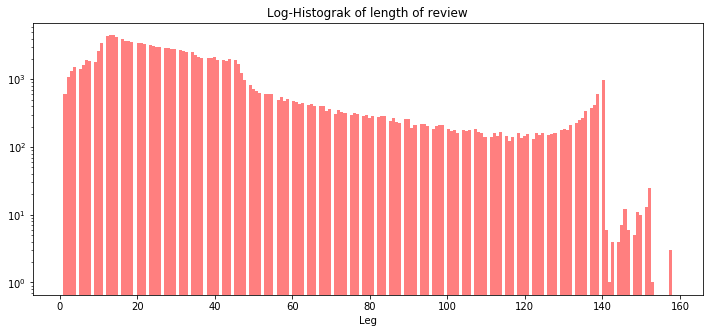

In [12]:
plt.figure(figsize = (12,5))
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histograk of length of review')
plt.xlabel('Leg')

{'whiskers': [<matplotlib.lines.Line2D at 0x2109c9ccf48>,
 'caps': [<matplotlib.lines.Line2D at 0x2109c9dc848>,
 'boxes': [<matplotlib.lines.Line2D at 0x2109ca7d2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2109c9dcfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2109c70e0c8>],
 'means': [<matplotlib.lines.Line2D at 0x2109c5284c8>]}

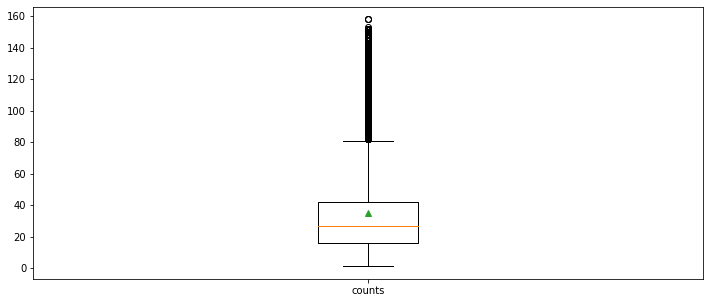

In [13]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels = ['counts'], showmeans = True)

In [14]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


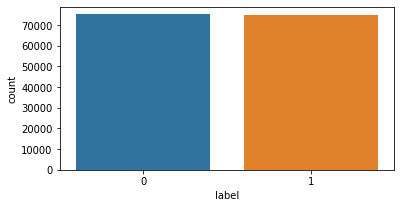

In [16]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [17]:
print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


Text(0, 0.5, 'Number of reviews')

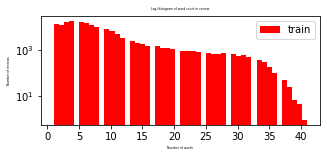

In [23]:
train_word_counts = train_data['document'].astype(str).apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(5,2))
plt.hist(train_word_counts, bins=50, facecolor='r', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize=3)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize=3)
plt.ylabel('Number of reviews', fontsize=3)

(array([1.2381e+04, 1.1836e+04, 1.5524e+04, 1.6836e+04, 0.0000e+00,
        1.4981e+04, 1.3418e+04, 1.1676e+04, 9.6440e+03, 0.0000e+00,
        7.8750e+03, 6.0380e+03, 4.6280e+03, 3.1930e+03, 0.0000e+00,
        2.4230e+03, 1.9610e+03, 1.7600e+03, 1.4880e+03, 0.0000e+00,
        1.3920e+03, 1.2400e+03, 1.1310e+03, 1.0600e+03, 0.0000e+00,
        9.1900e+02, 8.9500e+02, 8.7300e+02, 7.6500e+02, 0.0000e+00,
        7.0900e+02, 6.5700e+02, 6.6800e+02, 7.2100e+02, 0.0000e+00,
        6.3100e+02, 5.5800e+02, 5.7100e+02, 5.1100e+02, 0.0000e+00,
        3.6900e+02, 2.9300e+02, 1.7900e+02, 1.0400e+02, 0.0000e+00,
        5.3000e+01, 2.6000e+01, 7.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. , 17.8,
        18.6, 19.4, 20.2, 21. , 21.8, 22.6, 23.4, 24.2, 25. , 25.8, 26.6,
        27.4, 28.2, 29. , 29.8, 30.6, 31.4, 32.2, 33. , 33.8, 34.6, 35.4,
        36.2, 37. , 37

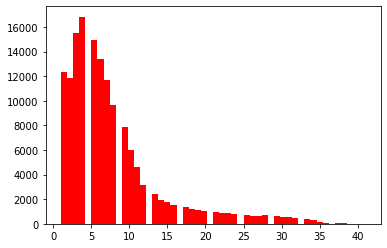

In [26]:
plt.hist(train_word_counts, bins=50, facecolor='r', label = 'train')

In [50]:
# 전처리

import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting=3)

In [52]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [59]:
review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [62]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)

In [63]:
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [64]:
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])

In [71]:
clean_review = [w for w in review_text if w not in stop_words]

In [72]:
clean_review

['더빙', '진짜', '짜증나다', '목소리']

In [76]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','', review)
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

In [77]:
clean_train_review = []

for review in train_data['document']:
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])
        
clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [78]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header = 0, delimiter = '\t', quoting=3)

In [79]:
clean_test_review = []

for review in test_data['document']:
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])
        
clean_test_review[:4]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [83]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index
max_sequences_length = 8

In [87]:
train_inputs = pad_sequences(train_sequences, maxlen=max_sequences_length, padding='post') 

train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences, maxlen=max_sequences_length, padding='post')
test_labels = np.array(test_data['label'])

In [ ]:
train_input_data = 'nsmc_train_input.npy'
train_label_data = 'nsmc_train_label.npy'
test_input_data = 'nsmc_test_input.npy'
test_label_data = 'nsmc_test_label.npy'
data_configs = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

import os

if not os.path.exists(default_path + data_in_path):
    os.makedirs(default_path + data_in_path)
#(생략)

In [89]:
train_inputs.shape

(150000, 8)